In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [5]:
# Load dataset

data = pd.read_csv("C:/Users/User/Downloads/Telecom.csv")

# Basic exploration
print(data.head())
print(data.describe())
print(data.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Data Analysis

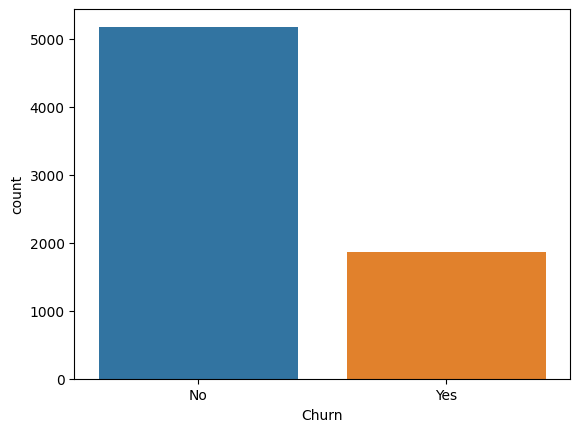

C:\Users\User\AppData\Local\Temp\ipykernel_19452\123792127.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


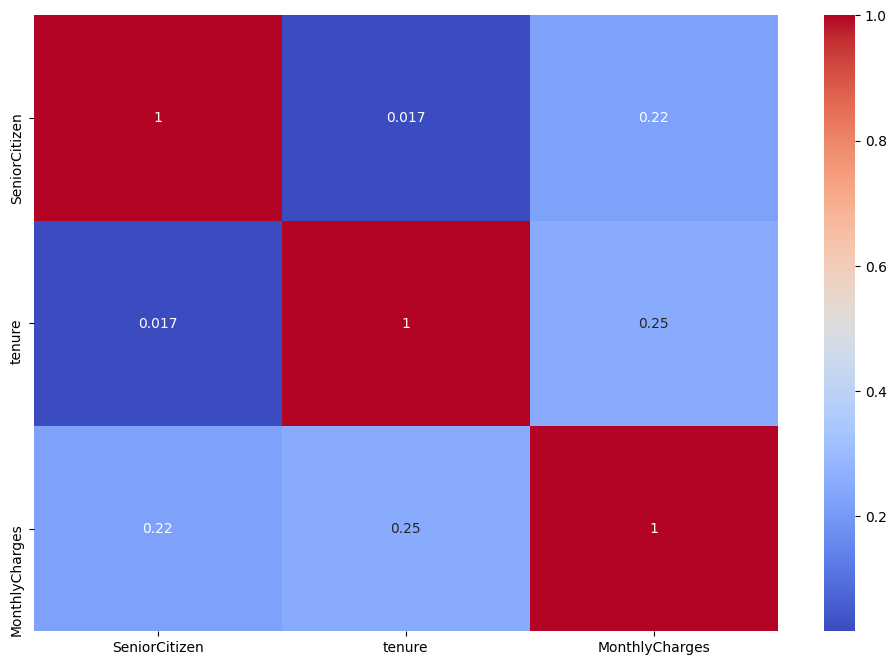

In [6]:
# Example of visualization: Distribution of target variable
sns.countplot(x='Churn', data=data)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


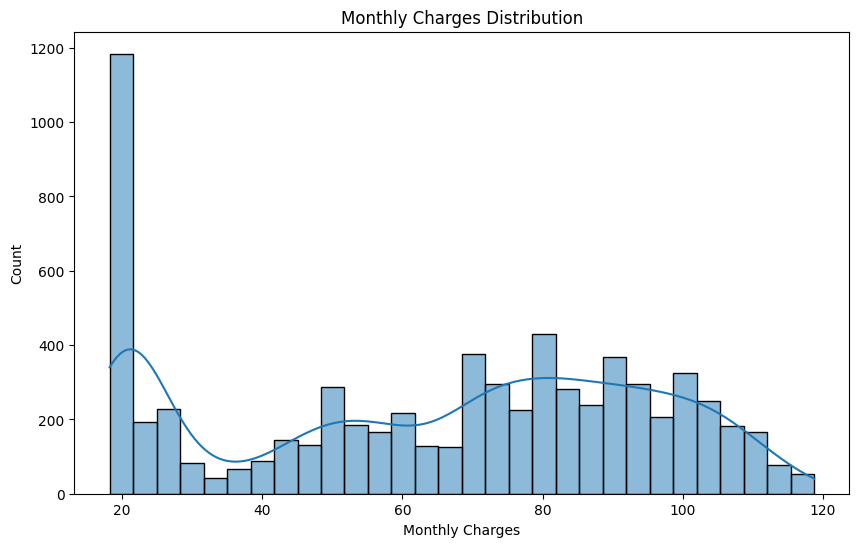

In [7]:
#Monthly Charges Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.show()

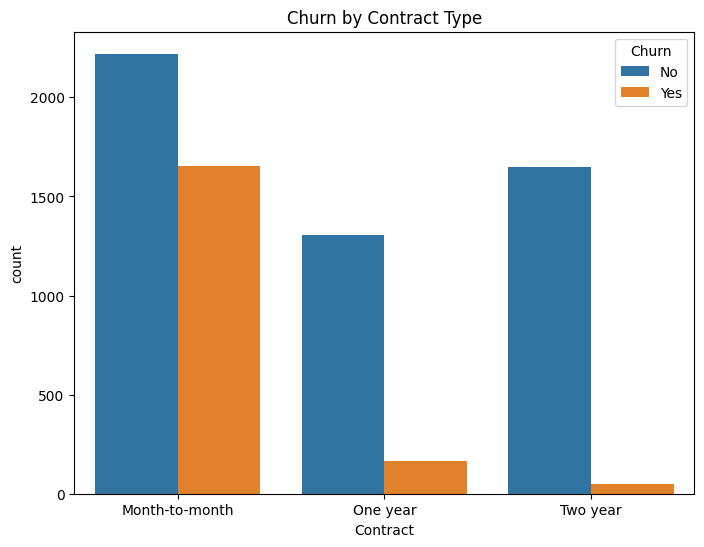

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

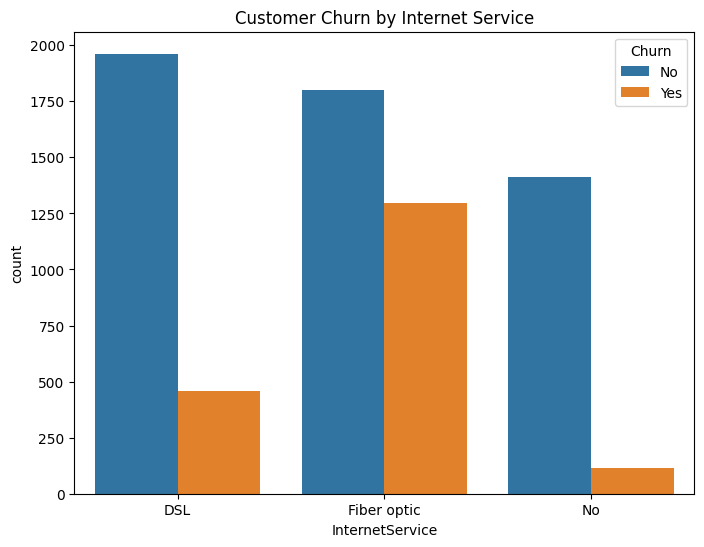

In [9]:
# Customer Churn by Internet Service
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Customer Churn by Internet Service')
plt.show()

In [10]:
# 11. Average Monthly Charges for Churned and Non-Churned Customers
average_monthly_charges = data.groupby('Churn')['MonthlyCharges'].mean()
print("Average Monthly Charges for Churned and Non-Churned Customers:")
print(average_monthly_charges)

# 12. Percentage of Senior Citizens Among Churned Customers
percentage_senior_citizens_churned = data[data['Churn'] == 'Yes']['SeniorCitizen'].mean() * 100
print(f"Percentage of Senior Citizens Among Churned Customers: {percentage_senior_citizens_churned:.2f}%")

# 13. Contract Length Statistics for Churned Customers
contract_length_stats_churned = data[data['Churn'] == 'Yes']['tenure'].describe()
print("Contract Length Statistics for Churned Customers:")
print(contract_length_stats_churned)

# 14. Most Common Payment Method for Churned Customers
most_common_payment_method_churned = data[data['Churn'] == 'Yes']['PaymentMethod'].mode().iloc[0]
print(f"Most Common Payment Method for Churned Customers: {most_common_payment_method_churned}")

Average Monthly Charges for Churned and Non-Churned Customers:
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
Percentage of Senior Citizens Among Churned Customers: 25.47%
Contract Length Statistics for Churned Customers:
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64
Most Common Payment Method for Churned Customers: Electronic check


# Preprocessing

In [9]:

# Handling missing values, encoding categorical variables, etc.
# Example: One-hot encoding for categorical variables
categorical_features = ['gender', 'Partner', 'Dependents'] 
numeric_features = ['tenure', 'MonthlyCharges']  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])



In [10]:
# Splitting data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Converting to binary

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing to training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (5634, 8)
Test set size: (1409, 8)


# Training 1st Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Training the model
logreg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluating the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Printing the evaluation metrics
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')
print('\nLogistic Regression Confusion Matrix:')
print(conf_matrix_logreg)
print('\nLogistic Regression Classification Report:')
print(class_report_logreg)


Logistic Regression Accuracy: 0.7963

Logistic Regression Confusion Matrix:
[[943  93]
 [194 179]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



# Training 2nd model

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Printing the evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('\nRandom Forest Confusion Matrix:')
print(conf_matrix_rf)
print('\nRandom Forest Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.7551

Random Forest Confusion Matrix:
[[897 139]
 [206 167]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1036
           1       0.55      0.45      0.49       373

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.76      0.75      1409



# Hyperparameter tuning

In [13]:
#hyperparameter for random forest
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=2)

# Perform grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.7878949236776713


In [14]:
#cross validation for logistic regression
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(LogisticRegression(random_state=42), 
                            X_train, 
                            y_train, 
                            cv=5)

# Print CV results
print("CV Scores for Logistic Regression:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))


CV Scores for Logistic Regression: [0.80035492 0.77639752 0.77018634 0.78704525 0.77264654]
Average CV Score: 0.7813261129612089


# Test results

In [15]:
#Random Forest as the final model
final_model = RandomForestClassifier(**grid_search_rf.best_params_)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

# Final evaluation
final_accuracy = accuracy_score(y_test, final_predictions)
final_conf_matrix = confusion_matrix(y_test, final_predictions)
final_class_report = classification_report(y_test, final_predictions)

print(f'Final Model Accuracy: {final_accuracy:.4f}')
print('\nFinal Model Confusion Matrix:')
print(final_conf_matrix)
print('\nFinal Model Classification Report:')
print(final_class_report)


Final Model Accuracy: 0.7892

Final Model Confusion Matrix:
[[938  98]
 [199 174]]

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

